<a href="https://colab.research.google.com/github/sara-fuentes/tfm_pisa_educacion/blob/main/TFM_PISA_CLASIFICACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta de investigación**
¿Cómo influye la implicación a de padres y profesores en el rendimiento académico de los alumnos?



# Justificación

Esta pregunta busca explorar la relación entre la participación de los padres y profesores en el proceso educativo y su efecto en el desempeño académico de los estudiantes, utilizando un enfoque analítico basado en datos cuantitativos y cualitativos.

In [1]:
import os
import subprocess

# Run the MLflow UI as a background process
# mlflow_ui_cmd = "mlflow ui --port 5000 --backend-store-uri file:///content/mlflow"
# process = subprocess.Popen(mlflow_ui_cmd.split(), stdout=subprocess.PIPE)

In [2]:
from pyngrok import ngrok

# Replace 'YOUR_TOKEN_HERE' with your actual authtoken
# ngrok.set_auth_token("2xTOWxKLSvkJxZiIv7yflxZbTZG_3AFfbcSSQfSbbFmeA5QXT")

# Open an HTTP tunnel on port 5000 (MLflow's default UI port)
# public_url = ngrok.connect(addr="http://localhost:5000")
# print(f"MLflow UI available at: {public_url}")

In [3]:
# Now you can import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pyreadstat
import mlflow

#from sklearn.preprocessing import StandardScaler #Check to see if this imports without errors now.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import shap
import warnings
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
np.random.seed(25)

c:\Users\saraf\anaconda3\envs\data_processing\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import mlflow
mlflow.set_tracking_uri("file:///C:/Users/saraf/OneDrive/Documentos/Data Science and AI/capstone project/mlruns")

experiment_name = "Deteccion_suspensos"
mlflow.set_experiment(experiment_name)

#activar autolog para scikit-learn
mlflow.sklearn.autolog()

2025/05/26 19:40:26 INFO mlflow.tracking.fluent: Experiment with name 'Deteccion_suspensos' does not exist. Creating a new experiment.


In [5]:
# df_students_spain= pd.read_csv("/content/drive/MyDrive/DataScience/Copia de df_students_num_485.csv") # gerardo
# compendio = pd.read_excel('/content/drive/MyDrive/DataScience/TFM/compendio_df_students.xlsx') # gerardo

df_students_spain= pd.read_csv("C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\df_students_num_485.csv") # sara
compendio = pd.read_excel('compendio_df_students.xlsx') # sara

# Exploración de datos

In [6]:
df_students_spain.head(5)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,aprobado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,0.0
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,...,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0


In [7]:
column_list = df_students_spain.columns.tolist()
print(column_list)

['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA', 'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA', 'aprobado']


In [8]:
# definimos una función que reciba un código y devuelva su significado

def obtener_significado(codigo, df_compendio):
    resultado = df_compendio.loc[df_compendio['Sigla'] == codigo, 'Explicacion']
    return resultado.iloc[0] if not resultado.empty else "Not found"

In [9]:
obtener_significado('CNT', compendio)

'Country'

## Selección de variables
Procedemos a una selección más cuidadosa de las columnas que vamos a usar para nuestro modelo. En este caso,todas estas columnas son exactamente las que tenemos en el dataset, pero de todas formas mantenemos su selección por si subimos otros  dataset

In [10]:
# lista de variables seleccionadas:

preguntas_seleccionadas = ['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q07JA', 'ST270Q01JA',
             'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA',
             'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA',
             'ST353Q07JA', 'ST353Q08JA', 'WB155Q08HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA',
             'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA']

In [11]:
# comprobar que todas las variables están en el dataset

variables_no_encontradas = []
for i in preguntas_seleccionadas:
    if i not in df_students_spain.columns:
        variables_no_encontradas.append(i)
        print(i)

## unión código - pregunta

In [12]:
for column in df_students_spain.columns:
    print(column + ': ' + str(obtener_significado(column, compendio)))

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q08JA: Agree/disagree: The teachers at my school are mean towards me.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How often: The teacher c

In [13]:
# invertir columna aprobado

df_students_spain['aprobado'] = df_students_spain['aprobado'].map({0: 1, 1: 0})

In [14]:
# renombrar aprobado a suspendido

df_students_spain.rename(columns={'aprobado': 'suspendido'}, inplace=True)

In [15]:
df_students_clean = df_students_spain.copy()

In [16]:
del df_students_spain

In [17]:
df_students_clean.columns

Index(['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
       'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
       'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
       'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
       'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
       'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
       'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA',
       'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA',
       'WB163Q08HA', 'suspendido'],
      dtype='object')

In [18]:
df_students_clean.tail()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,suspendido
30795,3.0,NaN,3.0,0.0,2.0,NaN,3.0,NaN,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1
30796,NaN,1.0,NaN,0.0,NaN,2.0,3.0,0.0,3.0,3.0,...,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1
30797,2.0,NaN,3.0,NaN,3.0,3.0,NaN,0.0,2.0,3.0,...,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0
30798,2.0,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
30799,NaN,NaN,NaN,1.0,2.0,3.0,2.0,0.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0


In [19]:
#Nos aseguramos que todos los registros de la target sean binarios
df_students_clean['suspendido'].unique()

array([1, 0], dtype=int64)

In [20]:
# Configurar pandas para que no trunque la salida
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

            Número de Nulos  Porcentaje de Nulos (%)
ST267Q01JA            12284                39.883117
ST267Q02JA            12397                40.250000
ST267Q03JA            12336                40.051948
ST267Q04JA            12422                40.331169
ST267Q05JA            12255                39.788961
ST267Q06JA            12517                40.639610
ST267Q07JA            12419                40.321429
ST267Q08JA            12250                39.772727
ST270Q01JA             1994                 6.474026
ST270Q02JA             2054                 6.668831
ST270Q03JA             2044                 6.636364
ST270Q04JA             2031                 6.594156
ST297Q01JA             1394                 4.525974
ST300Q01JA            20800                67.532468
ST300Q02JA            18790                61.006494
ST300Q03JA            20202                65.590909
ST300Q04JA            21289                69.120130
ST300Q05JA            20617                66.

## Eliminación de registros
Por el momento, no eliminaremos registros, pero si dejaremos el codigo por si necesitamos hacer el ejercicio en algun momento

In [21]:
#Contar los valores nulos en cada fila
#nulos_por_fila = df_students_clean.isnull().sum(axis=1)

# Contar cuántas filas tienen al menos 18 valores nulos
#filas_con_nulos = (nulos_por_fila >= 18).sum()

# Mostrar el resultado
#print(f'Número de filas con al menos 18 valores nulos: {filas_con_nulos}')

In [22]:
# Filtrar las filas que tienen AL menos de 18 valores nulos
#df_students_clean = df_students_clean[nulos_por_fila < 18]



In [23]:
# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

            Número de Nulos  Porcentaje de Nulos (%)
ST267Q01JA            12284                39.883117
ST267Q02JA            12397                40.250000
ST267Q03JA            12336                40.051948
ST267Q04JA            12422                40.331169
ST267Q05JA            12255                39.788961
ST267Q06JA            12517                40.639610
ST267Q07JA            12419                40.321429
ST267Q08JA            12250                39.772727
ST270Q01JA             1994                 6.474026
ST270Q02JA             2054                 6.668831
ST270Q03JA             2044                 6.636364
ST270Q04JA             2031                 6.594156
ST297Q01JA             1394                 4.525974
ST300Q01JA            20800                67.532468
ST300Q02JA            18790                61.006494
ST300Q03JA            20202                65.590909
ST300Q04JA            21289                69.120130
ST300Q05JA            20617                66.

# Alta Correlación

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,suspendido
ST267Q01JA,1.000000,0.408854,0.407588,-0.204616,0.416082,0.584547,0.487838,-0.421900,0.254856,0.242452,0.276197,0.232650,-0.044606,0.166136,0.140700,0.165614,0.090409,0.142352,0.131619,0.146025,0.158207,0.118042,0.136972,0.112770,0.091587,0.018577,0.117837,0.048242,0.006465,0.011916,0.039132,0.153036,0.362931,0.174086,0.135144,0.160882,0.147240,0.129549,-0.035404,-0.083664,0.132476,-0.158559
ST267Q02JA,0.408854,1.000000,0.432823,-0.124177,0.551743,0.408590,0.536564,-0.210244,0.251360,0.244478,0.250106,0.225181,-0.005610,0.151854,0.069449,0.138371,0.098225,0.171136,0.169423,0.152895,0.184729,0.136251,0.114197,0.162917,0.191644,0.074397,0.106024,0.066758,0.095874,0.127862,0.088596,0.166134,0.346473,0.186247,0.111829,0.165946,0.196698,0.141168,-0.003680,-0.041005,0.205410,-0.002011
ST267Q03JA,0.407588,0.432823,1.000000,-0.117773,0.435425,0.414072,0.377189,-0.247721,0.190760,0.173750,0.189203,0.170781,-0.014508,0.171858,0.125404,0.165756,0.095933,0.141595,0.152884,0.169696,0.166960,0.137659,0.151328,0.124262,0.111757,0.056606,0.114383,0.041343,0.051655,0.053833,0.074801,0.146104,0.327188,0.161942,0.103318,0.158016,0.142737,0.121671,-0.000659,-0.044853,0.146238,-0.104409
ST267Q04JA,-0.204616,-0.124177,-0.117773,1.000000,-0.165922,-0.240147,-0.210409,0.368199,-0.144974,-0.140600,-0.156535,-0.150147,0.031591,-0.049563,-0.070752,-0.071371,-0.026719,-0.071215,-0.046725,-0.064417,-0.089928,-0.074916,-0.037927,-0.039589,-0.075478,-0.010208,-0.038380,-0.002585,-0.013252,-0.027916,-0.023830,-0.123090,-0.195847,-0.092879,-0.066714,-0.079815,-0.095561,-0.069286,0.032387,0.066192,-0.088985,-0.015950
ST267Q05JA,0.416082,0.551743,0.435425,-0.165922,1.000000,0.438019,0.555602,-0.262955,0.260880,0.245344,0.252992,0.227411,-0.011364,0.166401,0.101463,0.160149,0.130195,0.185446,0.181767,0.177864,0.209764,0.177395,0.131414,0.153623,0.179724,0.076333,0.122268,0.063710,0.093902,0.084577,0.075385,0.184868,0.354211,0.200441,0.134194,0.180081,0.201065,0.151118,-0.024699,-0.077745,0.200516,-0.043580
ST267Q06JA,0.584547,0.408590,0.414072,-0.240147,0.438019,1.000000,0.540761,-0.429234,0.253441,0.240866,0.267337,0.234686,-0.035715,0.150791,0.125327,0.143714,0.084999,0.141508,0.127717,0.133649,0.152487,0.124675,0.128710,0.118020,0.119496,0.037829,0.095897,0.044182,0.016831,0.042603,0.028150,0.162415,0.395372,0.148147,0.125174,0.130238,0.133357,0.124543,-0.045552,-0.078669,0.128299,-0.105359
ST267Q07JA,0.487838,0.536564,0.377189,-0.210409,0.555602,0.540761,1.000000,-0.333831,0.302366,0.288968,0.305136,0.267826,-0.020538,0.130323,0.092200,0.130008,0.093950,0.154374,0.153821,0.174099,0.199279,0.141442,0.115079,0.152102,0.184072,0.039134,0.084918,0.053873,0.065213,0.072702,0.066886,0.156916,0.370272,0.169095,0.101439,0.166425,0.183616,0.140774,-0.009312,-0.059419,0.163764,-0.042474
ST267Q08JA,-0.421900,-0.210244,-0.247721,0.368199,-0.262955,-0.429234,-0.333831,1.000000,-0.218703,-0.216416,-0.230457,-0.204929,0.056571,-0.136680,-0.107910,-0.134711,-0.034947,-0.095565,-0.092972,-0.106456,-0.117625,-0.064382,-0.127148,-0.055750,-0.029601,-0.006679,-0.085572,-0.021636,0.006117,0.013865,0.039168,-0.128327,-0.294082,-0.142343,-0.118084,-0.126117,-0.113437,-0.098584,0.077755,0.127166,-0.097858,0.142658
ST270Q01JA,0.254856,0.251360,0.190760,-0.144974,0.260880,0.253441,0.302366,-0.218703,1.000000,0.704292,0.748240,0.658102,-0.038796,0.117113,0.050032,0.090908,0.083236,0.101624,0.097011,0.122971,0.137732,0.097198,0.100051,0.112836,0.115184,0.022477,0.085470,0.052401,0.032254,0.051376,0.037824,0.108486,0.255541,0.121904

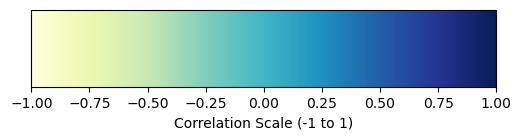

In [24]:
# Definir la matriz de correlación
df_corr = df_students_clean.corr(numeric_only=True)

# Visualizamos la matriz de correlación como DataFrame
styled_corr = df_corr.style.background_gradient(cmap='YlGnBu').set_caption("Correlation Matrix")

# Visualizamos el DataFrame
display(styled_corr)

# Dividimos por colores
fig, ax = plt.subplots(figsize=(6, 1))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=-1, vmax=1)
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('Correlation Scale (-1 to 1)')
plt.show()

In [25]:
df_students_clean.head()


,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,suspendido
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,4.0,NaN,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,1.0,3.0,NaN,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,1
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,3.0,3.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,1.0,NaN,3.0,3.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,1
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,2.0,3.0,1.0,4.0,4.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0


In [26]:
# Creamos un dataframe triangulo de las correlaciones para evitar que se repitan los valores
df_triangulo = pd.DataFrame(np.triu(df_corr, k=1), columns=df_students_clean.columns)
df_triangulo.index = df_students_clean.columns
#df_triangulo

Como vemos en la matriz, no hay correlaciones que superen el umbral del 0.9 que es el umbral aceptable para la eliminación de estas. Dejamos el codigo para futuros ejercicios

In [27]:
# Seleccionamos los pares de variables cuya correlación absoluta supere el umbral de 0.9
df_altas_correlaciones = df_triangulo.stack().reset_index()
df_altas_correlaciones.columns = ['variable1', 'variable2', 'correlacion']
df_altas_correlaciones = df_altas_correlaciones[df_altas_correlaciones['correlacion'].abs() > 0.9]
df_altas_correlaciones.head(5)

,variable1,variable2,correlacion


In [28]:
# Sacamos las correlaciones de las variables con la target
corr_con_target = df_students_clean.corr()['suspendido']
corr_con_target

ST267Q01JA   -0.158559
ST267Q02JA   -0.002011
ST267Q03JA   -0.104409
ST267Q04JA   -0.015950
ST267Q05JA   -0.043580
ST267Q06JA   -0.105359
ST267Q07JA   -0.042474
ST267Q08JA    0.142658
ST270Q01JA   -0.037563
ST270Q02JA   -0.015688
ST270Q03JA   -0.056187
ST270Q04JA   -0.040120
ST297Q01JA    0.123597
ST300Q01JA   -0.186397
ST300Q02JA   -0.193954
ST300Q03JA   -0.192808
ST300Q04JA    0.054469
ST300Q05JA   -0.048203
ST300Q06JA   -0.036097
ST300Q07JA   -0.086760
ST300Q08JA   -0.088531
ST300Q09JA    0.012407
ST300Q10JA   -0.157313
ST348Q04JA   -0.016092
ST348Q08JA    0.154216
ST353Q01JA    0.106415
ST353Q02JA   -0.050436
ST353Q05JA    0.035536
ST353Q06JA    0.166475
ST353Q07JA    0.183249
ST353Q08JA    0.114886
WB155Q08HA   -0.043903
WB155Q09HA   -0.058376
WB163Q01HA   -0.118107
WB163Q02HA   -0.123270
WB163Q03HA   -0.111570
WB163Q04HA   -0.054598
WB163Q05HA   -0.100940
WB163Q06HA    0.145382
WB163Q07HA    0.152488
WB163Q08HA   -0.008912
suspendido    1.000000
Name: suspendido, dtype: float64

# Baja Varianza

In [29]:
varianza= df_students_clean.var()
# Encontrar la columna con la varianza más alta
columna_max_varianza = varianza.idxmax()
valor_max_varianza = varianza.max()
# Encontrar la columna con la varianza más baja
columna_min_varianza = varianza.idxmin()
valor_min_varianza = varianza.min()
# Mostrar resultados
print(f'Columna con la mayor varianza: {columna_max_varianza}')
print(f'Valor de la varianza: {valor_max_varianza}')
print(f'Columna con la menor varianza: {columna_min_varianza}')
print(f'Valor de la menor varianza: {valor_min_varianza}')

Columna con la mayor varianza: ST300Q06JA
Valor de la varianza: 2.374069866920037
Columna con la menor varianza: ST297Q01JA
Valor de la menor varianza: 0.14585466151471918


In [30]:
varianza.sort_values()

ST297Q01JA    0.145855
suspendido    0.249805
WB163Q03HA    0.294834
WB163Q02HA    0.347248
WB163Q01HA    0.349069
ST267Q06JA    0.404462
WB163Q05HA    0.416619
WB163Q04HA    0.449127
WB163Q07HA    0.479756
WB155Q09HA    0.485136
ST267Q08JA    0.486056
WB163Q08HA    0.493906
ST267Q01JA    0.499426
ST267Q04JA    0.547595
WB163Q06HA    0.553724
ST267Q07JA    0.566586
ST267Q03JA    0.596340
WB155Q08HA    0.597585
ST267Q05JA    0.635902
ST267Q02JA    0.717645
ST270Q03JA    0.836568
ST353Q01JA    0.873225
ST270Q01JA    0.929604
ST270Q02JA    0.953903
ST300Q02JA    0.957922
ST353Q06JA    0.973488
ST353Q02JA    0.981248
ST353Q08JA    1.005309
ST348Q08JA    1.017347
ST270Q04JA    1.019728
ST353Q07JA    1.020019
ST348Q04JA    1.061321
ST353Q05JA    1.104551
ST300Q03JA    1.526084
ST300Q07JA    1.682057
ST300Q09JA    1.759127
ST300Q04JA    1.846899
ST300Q10JA    1.857860
ST300Q01JA    2.085219
ST300Q08JA    2.244874
ST300Q05JA    2.371935
ST300Q06JA    2.374070
dtype: float64

In [31]:
var_poca_varianza = []
print('baja varianza:')

for col in df_students_clean.columns:
  if df_students_clean[col].var() < 0.01:
    print(col, df_students_clean[col].var())
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)
print('cantidad', len(var_poca_varianza))

baja varianza:
eliminar []
cantidad 0


# Imputación de nulos

Imputación por KNN:
Para columnas con muchos valores nulos (>10%)
KNN puede capturar mejor las relaciones entre variables
Ayuda a mantener la estructura de los datos

Eliminación de filas:
Solo eliminar filas que tengan más del 50% de valores nulos
Esto evita perder demasiada información

Pros de usar KNNImputer para todos los nulos:

Consistencia en el método: Al usar un único método de imputación, mantenemos un enfoque coherente en todo el dataset.

Captura de relaciones: KNNImputer puede capturar mejor las relaciones entre variables que métodos más simples como la mediana o la moda.

Adaptabilidad: Se adapta automáticamente a la estructura de los datos, sin necesidad de decidir qué método usar para cada columna.

Para este caso específico, dado que:

El dataset no es extremadamente grande

Las variables están relacionadas entre sí (son respuestas de encuestas)

Queremos maximizar el F1 score

Sí recomendaría usar KNNImputer para todos los nulos, pero con algunas consideraciones:

In [32]:
# 1. Normalizar los datos
scaler = StandardScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_students_clean),
    columns=df_students_clean.columns
)

# 2. Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_normalized),
    columns=df_normalized.columns
)

# 3. Revertir la normalización
df_final = pd.DataFrame(
    scaler.inverse_transform(df_imputed),
    columns=df_imputed.columns
)

In [33]:
df_students_clean = df_final.copy() # canviar

# Modelado

## Split Train-Test

In [34]:
# Definir las características (X) y la variable objetivo (y)
X = df_students_clean.drop('suspendido', axis=1)
y = df_students_clean['suspendido']

In [35]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
print('nº observaciones de train:', len(y_train))
print('nº observaciones de test: ', len(y_test))

nº observaciones de train: 21560
nº observaciones de test:  9240


## Rebalanceo del train

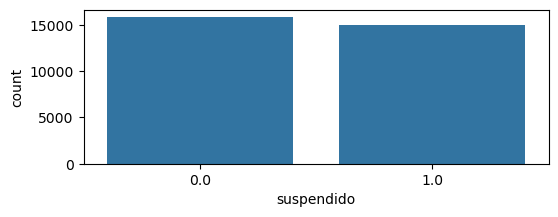

In [37]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_students_clean, x='suspendido')
plt.show()

In [38]:
# valores absolutos de cada clase de la target
y_train.value_counts()

0.0    11135
1.0    10425
Name: suspendido, dtype: int64

In [39]:
# proporción de cada clase de la target
y_train.value_counts(normalize=True)

0.0    0.516466
1.0    0.483534
Name: suspendido, dtype: float64

### Balanceado

In [40]:
"""
from imblearn.over_sampling import RandomOverSampler  # Importar RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el oversampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Aplicarlo solo al conjunto de entrenamiento
X_train_0_resampled, y_train_0_resampled = oversampler.fit_resample(X_train_0, y_train_0)

# Entrenar un modelo (ejemplo: Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_0_resampled, y_train_0_resampled)

# Hacer predicciones
y_pred_0 = model.predict(X_test_0)

# Evaluar el modelo
print(classification_report(y_test_0, y_pred_0))
"""

"\nfrom imblearn.over_sampling import RandomOverSampler  # Importar RandomOverSampler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report\n\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear el oversampler\noversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)\n\n# Aplicarlo solo al conjunto de entrenamiento\nX_train_0_resampled, y_train_0_resampled = oversampler.fit_resample(X_train_0, y_train_0)\n\n# Entrenar un modelo (ejemplo: Random Forest)\nmodel = RandomForestClassifier(random_state=42)\nmodel.fit(X_train_0_resampled, y_train_0_resampled)\n\n# Hacer predicciones\ny_pred_0 = model.predict(X_test_0)\n\n# Evaluar el modelo\nprint(classification_report(y_test_0, y_pred_0))\n"

In [41]:
# y_train_0.value_counts()

## Estandarización

Guardo las columnas del dataset en una lista antes de estandarizar.

El metodo scaler quita el nombre de las variables


In [42]:
# df_students_clean.describe()

In [43]:
variables_entrenadas = X.columns


No es necesario estandarizar las variables discretas que van de 0 a 2, 3, 4 y 5 por las siguientes razones:

Naturaleza de los datos: Las variables discretas ya tienen una escala natural y significativa. Por ejemplo, si tienes una escala de 0 a 5, cada número representa un nivel específico y la diferencia entre los valores tiene un significado interpretable.

Pérdida de interpretabilidad: La estandarización de variables discretas puede hacer que pierdan su significado original. Por ejemplo, si estandarizas una escala de 0-5, los valores resultantes (que típicamente estarían en el rango de -3 a +3) ya no representarían directamente los niveles originales.

Distancias relativas: En variables discretas, las distancias entre valores son significativas y no necesitan ser normalizadas. Por ejemplo, la diferencia entre 1 y 2 tiene el mismo significado que entre 3 y 4.

## Competición de modelos

In [44]:
modelos = []


# Modelos de reglas
modelos.append(('XGBClassifier', XGBClassifier(random_state=42, verbosity=0)))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False, random_seed=42)))
modelos.append(('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42)))
modelos.append(('LightGBM', LGBMClassifier(random_state=42)))

In [45]:
"""
from sklearn.model_selection import cross_val_score
# Evaluar cada modelo
resultados = []
n_splits = 5  # Número de splits para cross-validation

for nombre, modelo in modelos:
    scores = cross_val_score(modelo, X_train, y_train, cv=n_splits, scoring='accuracy')
    resultados.append((nombre, scores.mean(), scores.std()))

# Crear un DataFrame para mostrar los resultados
resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Precisión Media', 'Desviación Estándar'])
print(resultados_df)
"""

"\nfrom sklearn.model_selection import cross_val_score\n# Evaluar cada modelo\nresultados = []\nn_splits = 5  # Número de splits para cross-validation\n\nfor nombre, modelo in modelos:\n    scores = cross_val_score(modelo, X_train, y_train, cv=n_splits, scoring='accuracy')\n    resultados.append((nombre, scores.mean(), scores.std()))\n\n# Crear un DataFrame para mostrar los resultados\nresultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Precisión Media', 'Desviación Estándar'])\nprint(resultados_df)\n"

In [46]:
metricas_modelos = pd.DataFrame(columns=['modelo', 'F1'])

# guardar parámetros de cada modelo entrenado para consultarlos más tarde

model_params = {}

for nombre, modelo in modelos:

    # entrenamos el modelo
    modelo.fit(X_train, y_train)

    # hacemos la predicción sobre el dataset de test
    y_pred = modelo.predict(X_test)

    # calculamos el F1 Score
    f1 = metrics.f1_score(y_test, y_pred)

    # imprimimos el resultado por modelo
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'F1': f1}, index=[0])
                                  ])



    # guardamos los parámetros de cada modelo
    model_params[nombre] = modelo.get_params()

metricas_modelos.sort_values('F1', ascending=False)

2025/05/26 19:44:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ed90cffc562a45878f15e43e4b21fa1f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


[LightGBM] [Info] Number of positive: 10425, number of negative: 11135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7149
[LightGBM] [Info] Number of data points in the train set: 21560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483534 -> initscore=-0.065887
[LightGBM] [Info] Start training from score -0.065887


,modelo,F1
0,XGBClassifier,0.910425
0,CatBoostClassifier,0.906090
0,LightGBM,0.895752
0,HistGradientBoostingClassifier,0.894128


Resultado competición de modelos datos rebalanceados, elegimos no rebalancear

In [47]:
"""
from sklearn.metrics import f1_score
# Datos rebalanceados
# Crear una copia de los datos originales
X_train_0 = X_train.copy()
y_train_0 = y_train.copy()

# Crear el undersampler
undersampler = RandomUnderSampler(sampling_strategy=1.0, replacement=False, random_state=42)  # 1.0 = igualar clases

# Aplicarlo solo al conjunto de entrenamiento y crear nuevas variables para los datos rebalanceados
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_0, y_train_0)

# Lista de modelos
modelos = {
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoostClassifier': CatBoostClassifier(verbose=0, random_seed=42),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, verbosity=0)
}

# Evaluar cada modelo en el conjunto de datos rebalanceado
resultados_rebalanceados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_balanced, y_train_balanced)  # Entrenar el modelo con datos rebalanceados
    predicciones = modelo.predict(X_test)  # Hacer predicciones en el conjunto de prueba
    f1 = f1_score(y_test, predicciones, average='weighted')  # Calcular F1 Score
    resultados_rebalanceados[nombre] = f1  # Guardar resultados

# Mostrar resultados de la competición con datos rebalanceados
print("Resultados de la competición de modelos (rebalanceados):")
for nombre, f1 in resultados_rebalanceados.items():
    print(f'{nombre}: F1 Score = {f1:.4f}')

"""

'\nfrom sklearn.metrics import f1_score\n# Datos rebalanceados\n# Crear una copia de los datos originales\nX_train_0 = X_train.copy()\ny_train_0 = y_train.copy()\n\n# Crear el undersampler\nundersampler = RandomUnderSampler(sampling_strategy=1.0, replacement=False, random_state=42)  # 1.0 = igualar clases\n\n# Aplicarlo solo al conjunto de entrenamiento y crear nuevas variables para los datos rebalanceados\nX_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_0, y_train_0)\n\n# Lista de modelos\nmodelos = {\n    \'LightGBM\': LGBMClassifier(random_state=42),\n    \'CatBoostClassifier\': CatBoostClassifier(verbose=0, random_seed=42),\n    \'HistGradientBoostingClassifier\': HistGradientBoostingClassifier(random_state=42),\n    \'XGBClassifier\': XGBClassifier(random_state=42, verbosity=0)\n}\n\n# Evaluar cada modelo en el conjunto de datos rebalanceado\nresultados_rebalanceados = {}\nfor nombre, modelo in modelos.items():\n    modelo.fit(X_train_balanced, y_train_balan

# Hiperparametrización

In [48]:
# vemos cuales son los parámetros por defecto con los que se ha entrenado el modelo

print(model_params['LightGBM'])

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [49]:
"""# Definir el modelo
modelo = LGBMClassifier(random_state=42)

# Definir los parámetros a ajustar
parametros = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=modelo,
                           param_grid=parametros,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor precisión obtenida:")
print(grid_search.best_score_)"""

'# Definir el modelo\nmodelo = LGBMClassifier(random_state=42)\n\n# Definir los parámetros a ajustar\nparametros = {\n    \'num_leaves\': [31, 50, 100],\n    \'max_depth\': [-1, 10, 20],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [100, 200, 300],\n    \'subsample\': [0.6, 0.8, 1.0]\n}\n\n# Configurar GridSearchCV\ngrid_search = GridSearchCV(estimator=modelo,\n                           param_grid=parametros,\n                           scoring=\'accuracy\',\n                           cv=5,\n                           verbose=1,\n                           n_jobs=-1)\n\n# Ajustar el modelo\ngrid_search.fit(X_train, y_train)\n\n# Resultados\nprint("Mejores parámetros encontrados:")\nprint(grid_search.best_params_)\nprint("Mejor precisión obtenida:")\nprint(grid_search.best_score_)'

# Entrenamiento del modelo final

In [50]:
with mlflow.start_run():

    # Definir el modelo
    # selección del mejor modelo con los mejores parámetros
    modelo =  LGBMClassifier(verbose=1, random_seed=42)

    # entrenamiento
    modelo.fit(X_train, y_train)

# predict en el dataset de train
y_train_pred = modelo.predict(X_train)

# predict proba en el dataset de train
y_train_pred_proba = modelo.predict_proba(X_train)[:, 1]

# predict en el dataset de test
y_test_pred = modelo.predict(X_test)

# predict proba en el dataset de test
y_test_pred_proba = modelo.predict_proba(X_test)[:, 1]

f1 = metrics.f1_score(y_test, y_test_pred, average='weighted') ####

#mlflow.log_metric("f1_score", f1) ###

# Optional: log model
#mlflow.sklearn.log_model(modelo, "model")

[LightGBM] [Info] Number of positive: 10425, number of negative: 11135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7149
[LightGBM] [Info] Number of data points in the train set: 21560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483534 -> initscore=-0.065887
[LightGBM] [Info] Start training from score -0.065887


# Evaluación del modelo final

## AUC

In [51]:
# auc train
auc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)
print('auc train:', round(auc_train,4))

auc train: 0.9867


In [52]:
# auc_test
auc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('auc test:', round(auc_test,4))

auc test: 0.9659


### ROC Curve

In [53]:
# metricas para la curva ROC
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred_proba)

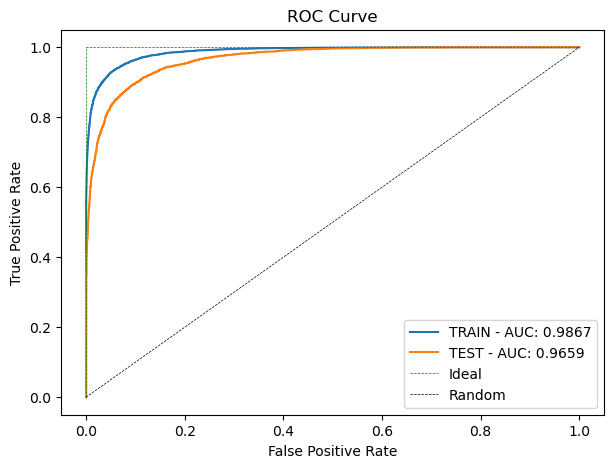

In [54]:
#Plot
plt.figure(figsize=[7,5])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Matriz de confusión

In [55]:
# creamos la matriz de confusión
cm_test = metrics.confusion_matrix(y_test, y_test_pred)

[]

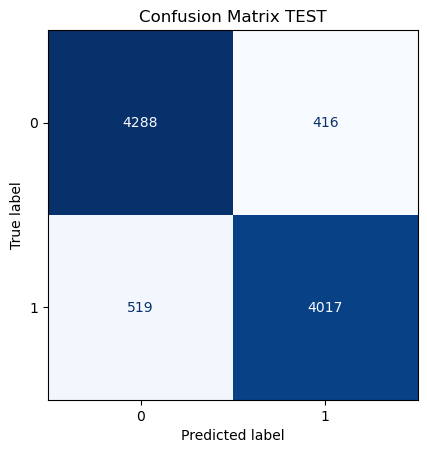

In [56]:
# gráfico de la matriz de confusión en cantidades
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST')
plt.plot()

[]

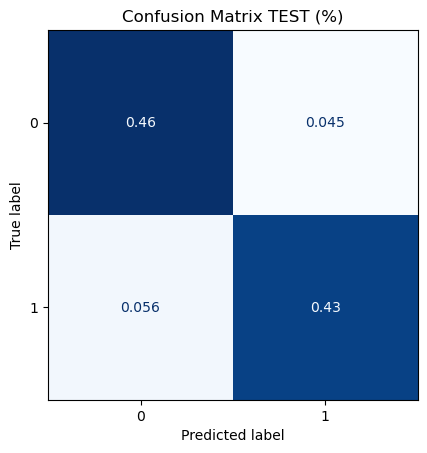

In [57]:
# gráfico de la matriz de confusión en %
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test))
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST (%)')
plt.plot()

## F1_score

In [58]:
f1_score_sklearn = metrics.f1_score(y_test, y_test_pred)

In [59]:
print('f1_score:', round(f1_score_sklearn, 4))

f1_score: 0.8958


In [60]:
import pickle

# guardamos modelo
pickle.dump(modelo, open('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\modelos\\predecir_suspende.p', 'wb')) # esto lo deja guardado temporalmente en colab, a la izquierda, hay que descargarlo

In [61]:
# creamos un dataframe con los datos de X_test y las variables como columnas (por eso las guardamos antes)
df_X_test = pd.DataFrame(X_test, columns=variables_entrenadas)
df_X_test.head(5)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,ST270Q03JA,ST270Q04JA,ST297Q01JA,ST300Q01JA,ST300Q02JA,ST300Q03JA,ST300Q04JA,ST300Q05JA,ST300Q06JA,ST300Q07JA,ST300Q08JA,ST300Q09JA,ST300Q10JA,ST348Q04JA,ST348Q08JA,ST353Q01JA,ST353Q02JA,ST353Q05JA,ST353Q06JA,ST353Q07JA,ST353Q08JA,WB155Q08HA,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA
27739,3.0,3.0,2.000000,0.000000,1.000000e+00,2.000000e+00,2.5,0.000000,2.220446e-16,1.0,2.0,3.0,0.0,2.000000e+00,3.029745,2.550331,1.000000,2.000000,1.571102,2.000000e+00,2.0,1.00000,1.988754e+00,2.000000,0.614697,1.000000,1.00754,2.000000,1.000000,1.000000,0.397349,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22429,1.0,0.0,0.000000,1.000000,1.823737e-07,3.171350e-07,1.0,3.000000,2.220446e-16,2.0,2.0,1.0,0.0,1.215570e+00,3.193278,1.428211,1.985715,2.046040,1.207732,4.000000e+00,0.0,2.00000,4.440892e-16,1.406880,0.000000,0.595136,0.00000,0.000000,1.000000,0.195184,0.189574,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
7937,2.0,2.0,3.000000,0.000000,2.000000e+00,3.000000e+00,2.0,0.558985,3.000000e+00,3.0,3.0,3.0,1.0,4.000000e+00,4.000000,4.000000,2.994213,4.000000,3.443243,4.000000e+00,4.0,4.00000,4.000000e+00,1.860612,3.000000,2.052167,2.00000,2.000000,1.992247,2.000000,3.000000,3.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0
24575,3.0,2.0,1.622345,2.000000,2.213599e+00,2.459891e+00,3.0,1.000000,2.000000e+00,2.0,3.0,3.0,0.0,1.359514e+00,2.228422,2.000000,4.000000,2.647314,4.000000,3.179181e+00,0.0,1.85518,4.000000e+00,2.000000,1.000000,0.000000,0.00000,2.237658,0.000000,0.375048,0.000000,0.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
12405,2.5,1.0,2.000000,0.800077,2.000000e+00,2.000000e+00,2.0,1.000000,1.000000e+00,1.0,1.0,0.0,0.0,-4.440892e-16,0.000000,4.000000,1.000000,0.819046,0.000000,-4.440892e-16,0.0,4.00000,4.440892e-16,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000,0.000000,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0


In [62]:
# df_students_clean.head()

## Modelo de arbol de desición

## Shap Values

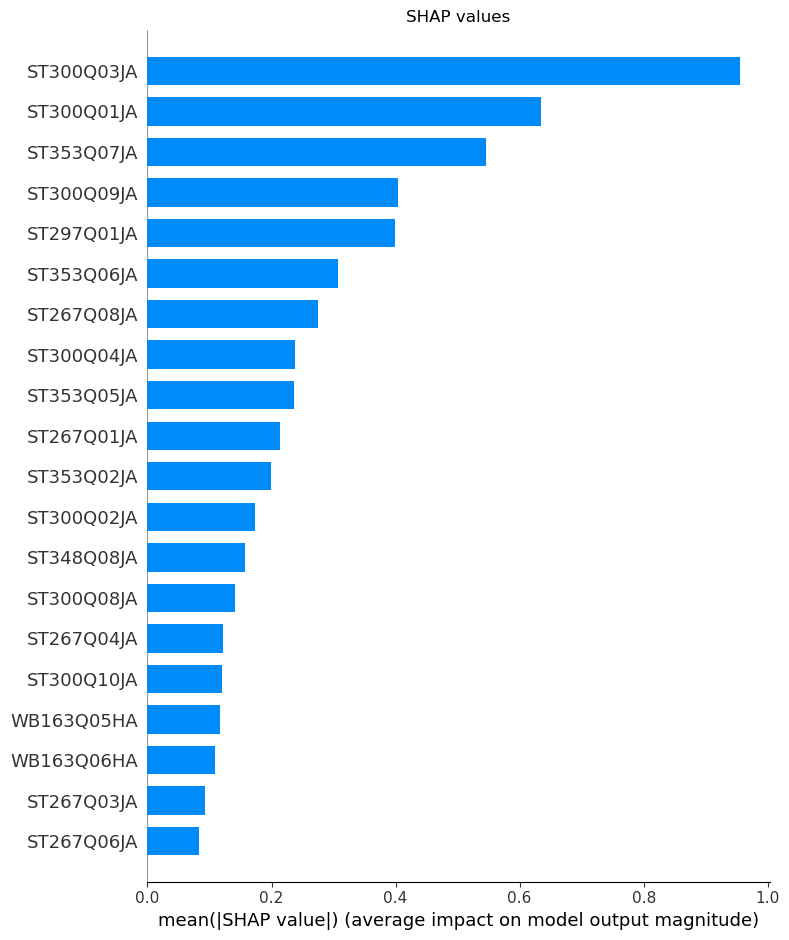

In [63]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)

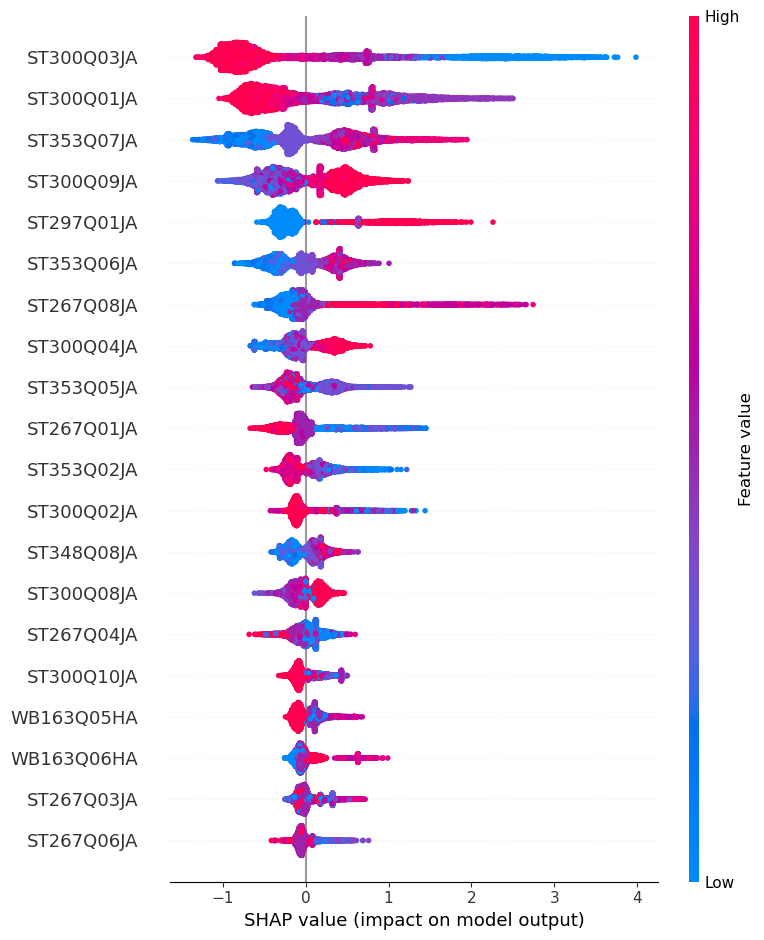

In [64]:
shap.summary_plot(shap_values, df_X_test)

### Interpretabilidad top 5 variables

In [65]:
# Poner aca una explicación de estas variables

# MLFlow Final Logging and Download Results

In [66]:
# mlflow.log_metric("auc_test", auc_test)
# mlflow.log_metric('f1_score', f1)

In [67]:
# import shutil

# shutil.make_archive('/content/mlruns_archive', 'zip', '/content/mlflow')

In [68]:
import os
print("Tracking URI:", mlflow.get_tracking_uri())

Tracking URI: file:///C:/Users/saraf/OneDrive/Documentos/Data Science and AI/capstone project/mlruns
